In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

### Set the number of lilypads

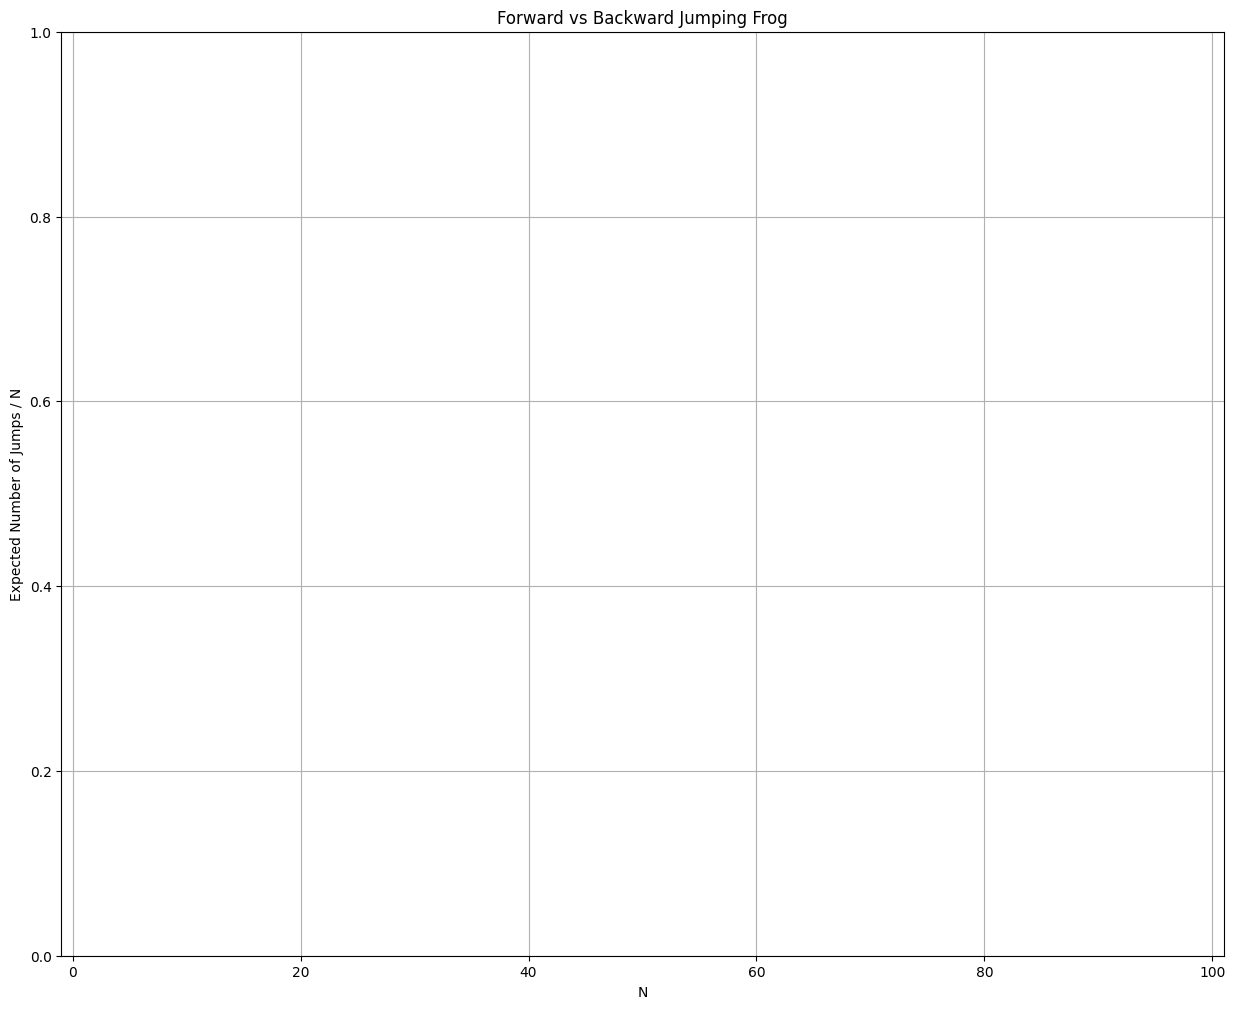

In [68]:
n = 100
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)

ax.set_title("Forward vs Backward Jumping Frog")
ax.set_xlabel('N')
ax.set_ylabel('Expected Number of Jumps / N')
ax.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax.grid(True)

### seed the random number generator

In [69]:
random.seed(1)

In [70]:
def frogger(n, backward):
    """
    
    :param n: num pads
    :param backward: 0 for no backwards movement, 1 for backwards
    :return: 
    """
    start = 0 # start at lilypad 0
    jumpsum = 0 # keep track of the number of jumps per simulation
    total_jumps = 0 # keep track of the total number of jumps for all simulations
    n_trys = 10000 # number of simulations to run
    
    x = [] # array for the number of lilypads for plotting
    y = [] # array for the expectation value for plotting
    eval = [] # array for the analytic solution
    eval_harmonic = [] # array for the analytic solution
    x_harmonic = [] # array for the harmonic mean
    sigma = [] # array for the error on the expectation value
    
    #
    # Evaluate the analytic solution shown above
    #
    # loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
    for npad in range(0,n+1): 
    
        if (npad == 0):
            eval.append(1)
        else:
            sum = 1.0
            for i in range(0,npad):
                #print(i,npad,npad-i)
                #print(eval[npad-i-1])
                sum = sum + 1.0/(npad+1)*(eval[npad-i-1])
            eval.append(sum)
        #print("Theory: ",npad,eval[npad])
    #
    # Run the simulation
    #
    # (also, evaluate the harmonic mean along the way)
    #
    for npad in range(0,n+1):
        
        x_harmonic.append(npad+1)
        x.append(npad)
        
        sum2 = (npad+1.0)/stats.hmean(x_harmonic)
        eval_harmonic.append(sum2)
        
        #print ("Harmonic mean for npad = ",npad," = ", sum2)
        
        end = npad+1
        current_paddle = start
        
        # run the simulation n_trys times
        for j in range(n_trys):
            
            # run the simulation until the frog reaches the other side
            while current_paddle < end:
                # choose a random jump size between 1 and the number of lilypads left to jump
                jump = int(random.uniform(-1 * backward * current_paddle,(end-current_paddle+1)))
                #print ("Jump = ",jump)
                
                # jump ahead
                current_paddle = current_paddle + jump
                #print ("Now at ",current_paddle)
                
                # keep track of the number of jumps
                jumpsum = jumpsum + 1
                
            # reset the frog to the start for the next simulation
            current_paddle = start
            #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
            
            # keep track of the total number of jumps for all simulations
            total_jumps = total_jumps + jumpsum
            
            # reset the jumpsum for the next simulation
            jumpsum = 0
        
        #print (npad,total_jumps,n_trys)
    
        # calculate the expectation value
        expectation_value = total_jumps/n_trys*1.0
        
        # store the expectation value and the error on the expectation value for plotting
        y.append(expectation_value)
        sigma.append(expectation_value*1/np.sqrt(n_trys))
        
        # reset the total number of jumps for all simulations, for the next value of npad
        total_jumps = 0
        
        print ("Expectation value for n = %d is %f" % (npad,expectation_value))
        
        # plot the results


    
    ax.errorbar(x,y,yerr=sigma,fmt='ro' if backward else 'bo', label='backward' if backward else 'forward')
    if not backward:
        ax.plot(x,eval,'k--', label='analytic')
    # ax.plot(x,eval_harmonic,'g--')


Expectation value for n = 0 is 1.992900
Expectation value for n = 1 is 2.489800
Expectation value for n = 2 is 2.804000
Expectation value for n = 3 is 3.111100
Expectation value for n = 4 is 3.250900
Expectation value for n = 5 is 3.468400
Expectation value for n = 6 is 3.587200
Expectation value for n = 7 is 3.712800
Expectation value for n = 8 is 3.838000
Expectation value for n = 9 is 3.930500
Expectation value for n = 10 is 4.010200
Expectation value for n = 11 is 4.104000
Expectation value for n = 12 is 4.196200
Expectation value for n = 13 is 4.272000
Expectation value for n = 14 is 4.299400
Expectation value for n = 15 is 4.378100
Expectation value for n = 16 is 4.439400
Expectation value for n = 17 is 4.481100
Expectation value for n = 18 is 4.544000
Expectation value for n = 19 is 4.567400
Expectation value for n = 20 is 4.621800
Expectation value for n = 21 is 4.686800
Expectation value for n = 22 is 4.737000
Expectation value for n = 23 is 4.827000
Expectation value for n = 

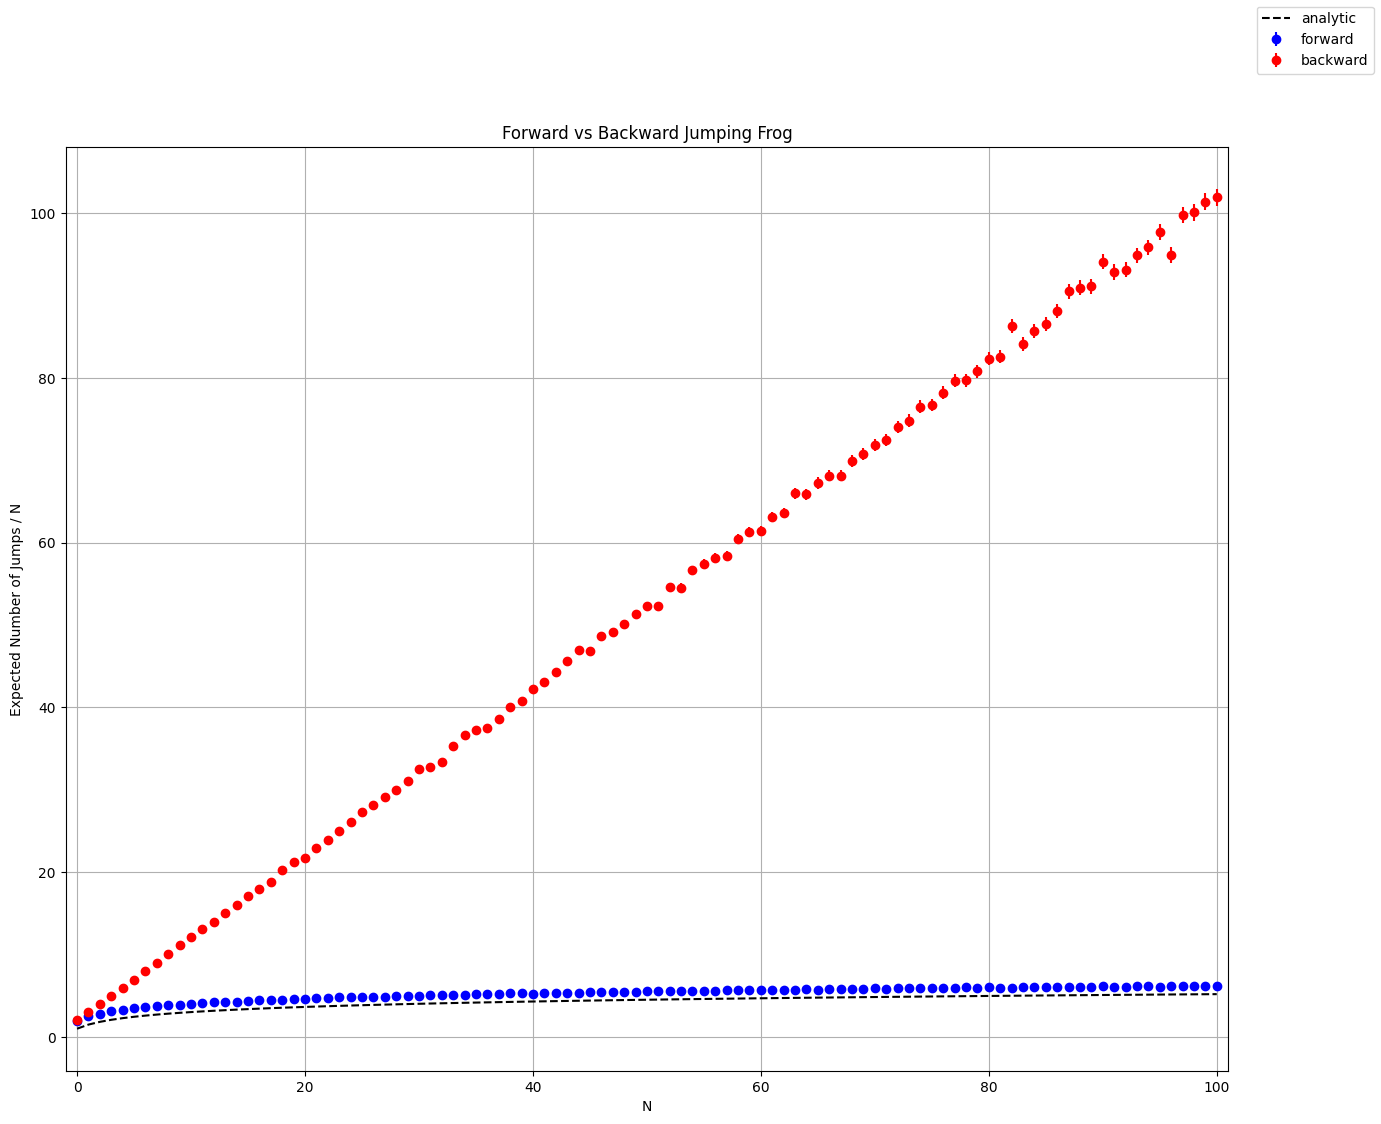

In [71]:
frogger(100,0)
frogger(100,1)
fig.legend()
fig

#### q1a response
as shown by the red line, the expected number of jumps over n has this constant rate of increase. this is because every turn, the frog has an equal probability to jump to any random lilypad, both forwards and backwards. this essentially means that every turn, the frog rolls a dice to see if it will make it to the end. as for the only forward movement, the frog is always making progress towards the end, so the chance of it reaching the end after each turn will increase.

## Q1b

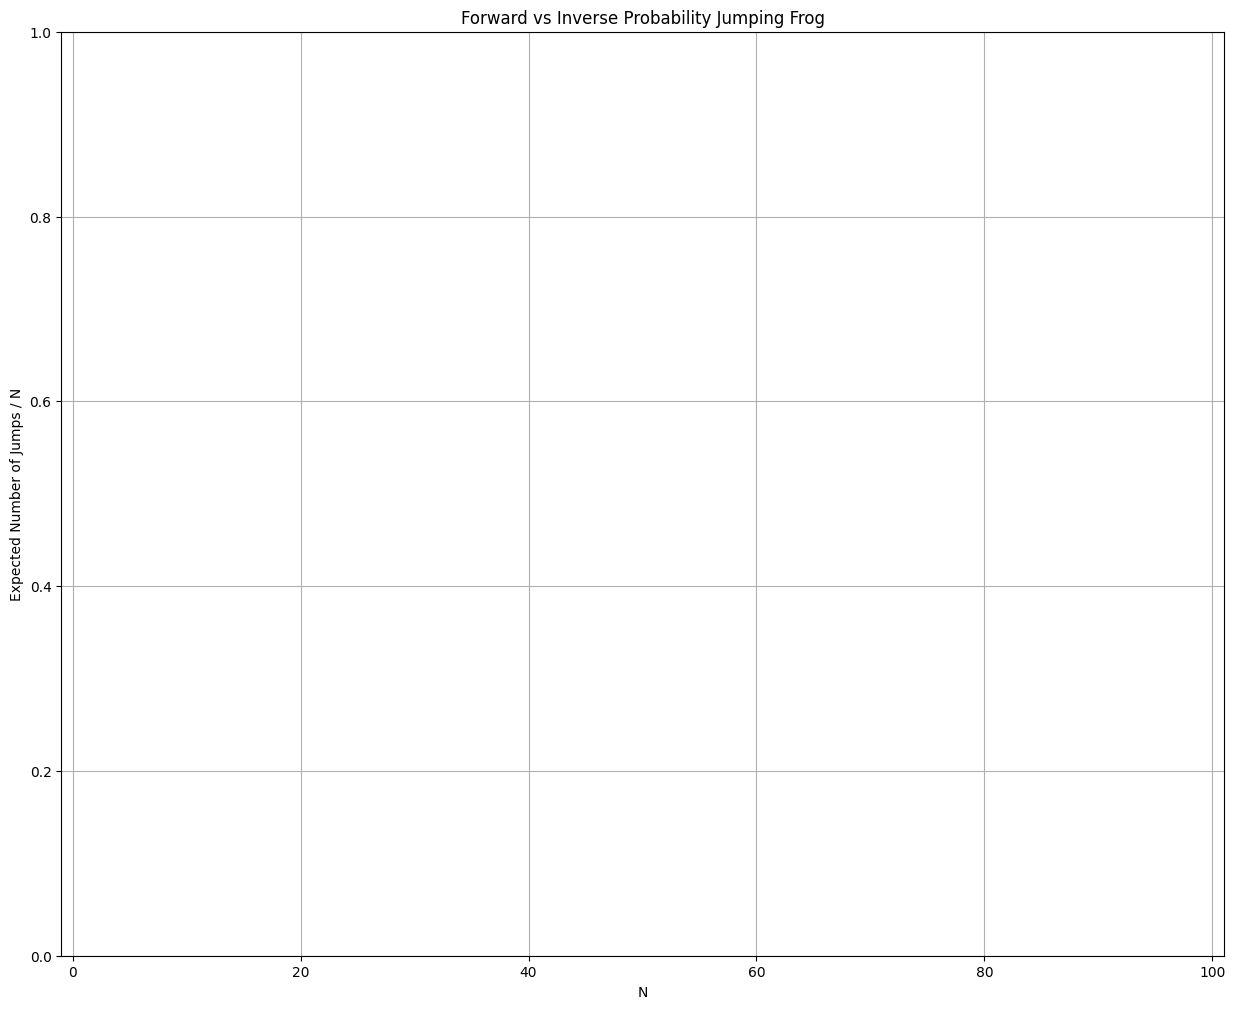

In [96]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)

ax.set_title("Forward vs Inverse Probability Jumping Frog")
ax.set_xlabel('N')
ax.set_ylabel('Expected Number of Jumps / N')
ax.set_xlim(-1,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax.grid(True)

In [97]:
def frogger(n, inverse):
    """
    
    :param n: num pads
    :param inverse: true or false
    :return: 
    """
    start = 0 # start at lilypad 0
    jumpsum = 0 # keep track of the number of jumps per simulation
    total_jumps = 0 # keep track of the total number of jumps for all simulations
    n_trys = 10000 # number of simulations to run
    
    x = [] # array for the number of lilypads for plotting
    y = [] # array for the expectation value for plotting
    eval = [] # array for the analytic solution
    eval_harmonic = [] # array for the analytic solution
    x_harmonic = [] # array for the harmonic mean
    sigma = [] # array for the error on the expectation value
    
    #
    # Evaluate the analytic solution shown above
    #
    # loop over the number of lilypads (it's n+1 so that we actually do the npad=n_max case)
    for npad in range(0,n+1): 
    
        if (npad == 0):
            eval.append(1)
        else:
            sum = 1.0
            for i in range(0,npad):
                #print(i,npad,npad-i)
                #print(eval[npad-i-1])
                sum = sum + 1.0/(npad+1)*(eval[npad-i-1])
            eval.append(sum)
        #print("Theory: ",npad,eval[npad])
    #
    # Run the simulation
    #
    # (also, evaluate the harmonic mean along the way)
    #
    for npad in range(0,n+1):
        
        x_harmonic.append(npad+1)
        x.append(npad)
        
        sum2 = (npad+1.0)/stats.hmean(x_harmonic)
        eval_harmonic.append(sum2)
        
        #print ("Harmonic mean for npad = ",npad," = ", sum2)
        
        end = npad+1
        current_paddle = start
        
        # run the simulation n_trys times
        for j in range(n_trys):
            
            # run the simulation until the frog reaches the other side
            while current_paddle < end:
                # choose a random jump size between 1 and the number of lilypads left to jump
                if inverse:
                    # inverse probability of jumping forward based on distance, pick a random paddle to jump to based on probability
                    paddles = np.arange(1, end-current_paddle+1)
                    probabilities = np.ones_like(paddles) / paddles
                    # need to normalize the probabilities
                    probabilities /= probabilities.sum()
                    jump = np.random.choice(paddles, p=probabilities)
                else:
                    jump = int(random.uniform(0,(end-current_paddle+1)))
                #print ("Jump = ",jump)
                
                # jump ahead
                current_paddle = current_paddle + jump
                #print ("Now at ",current_paddle)
                
                # keep track of the number of jumps
                jumpsum = jumpsum + 1
                
            # reset the frog to the start for the next simulation
            current_paddle = start
            #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
            
            # keep track of the total number of jumps for all simulations
            total_jumps = total_jumps + jumpsum
            
            # reset the jumpsum for the next simulation
            jumpsum = 0
        
        #print (npad,total_jumps,n_trys)
    
        # calculate the expectation value
        expectation_value = total_jumps/n_trys*1.0
        
        # store the expectation value and the error on the expectation value for plotting
        y.append(expectation_value)
        sigma.append(expectation_value*1/np.sqrt(n_trys))
        
        # reset the total number of jumps for all simulations, for the next value of npad
        total_jumps = 0
        
        print ("Expectation value for n = %d is %f" % (npad,expectation_value))
        
        # plot the results


    
    ax.errorbar(x,y,yerr=sigma,fmt='ro' if inverse else 'bo', label='inverse probability' if inverse else 'normal')
    if not inverse:
        ax.plot(x,eval,'k--', label='analytic')
    # ax.plot(x,eval_harmonic,'g--')


Expectation value for n = 0 is 2.017700
Expectation value for n = 1 is 2.515200
Expectation value for n = 2 is 2.843300
Expectation value for n = 3 is 3.081200
Expectation value for n = 4 is 3.260100
Expectation value for n = 5 is 3.468700
Expectation value for n = 6 is 3.610700
Expectation value for n = 7 is 3.705000
Expectation value for n = 8 is 3.841100
Expectation value for n = 9 is 3.966400
Expectation value for n = 10 is 4.043200
Expectation value for n = 11 is 4.136900
Expectation value for n = 12 is 4.174500
Expectation value for n = 13 is 4.263000
Expectation value for n = 14 is 4.335400
Expectation value for n = 15 is 4.381900
Expectation value for n = 16 is 4.409100
Expectation value for n = 17 is 4.472800
Expectation value for n = 18 is 4.528600
Expectation value for n = 19 is 4.577500
Expectation value for n = 20 is 4.673000
Expectation value for n = 21 is 4.701100
Expectation value for n = 22 is 4.731700
Expectation value for n = 23 is 4.783000
Expectation value for n = 

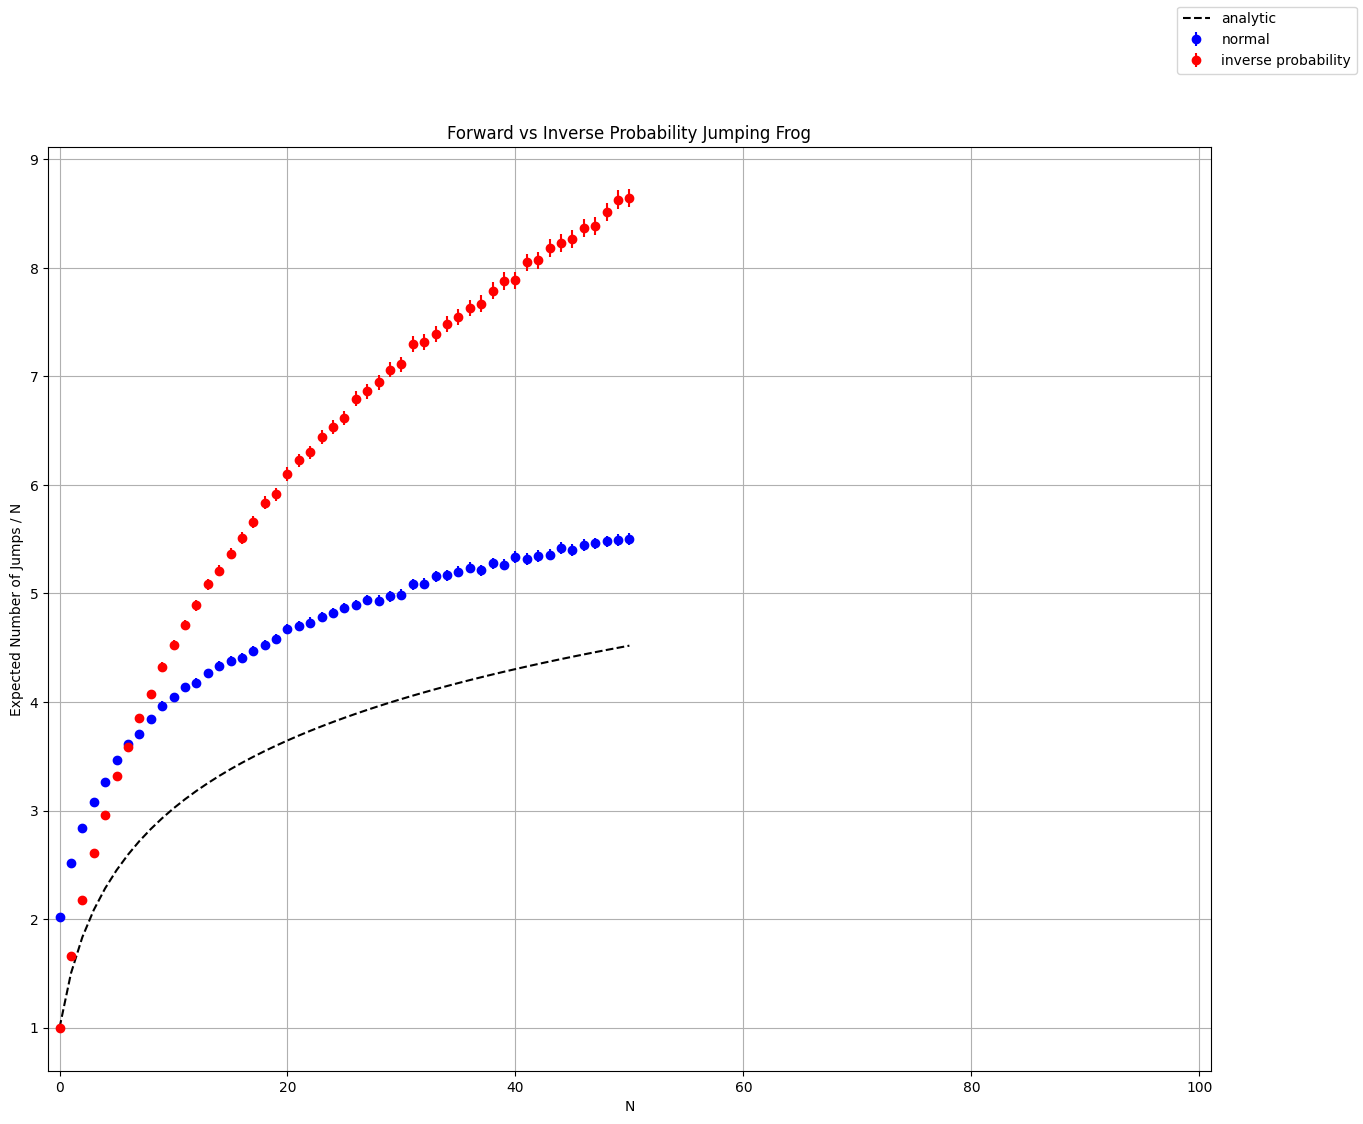

In [98]:
# doing 50 pads because it's so slow with the inverse probability
frogger(50,False)
frogger(50,True)
fig.legend()
fig

#### q1b response
As expected, the inverse probability method is much slower than the normal method. The reason for this is that we decreased the probability of jumping further. Because of this, the frog is likely to make smaller jumps, and therefore requires more jumps to get to the end. As for the original method, the frog is equally lucky to make any jump, so there is no 'punishment' for making a larger jump.